## Rotate images properly

In [1]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [2]:
img = cv2.imread(r'images/aug/aug_353-shruthi_17.jpeg')

In [3]:
# convert the image to grayscale and flip the foreground and background to ensure foreground is now "white" and
# the background is "black"
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
# threshold the image, setting all foreground pixels to 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

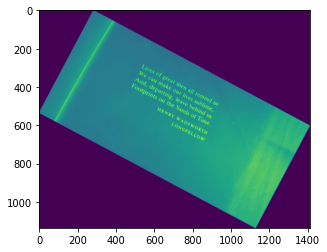

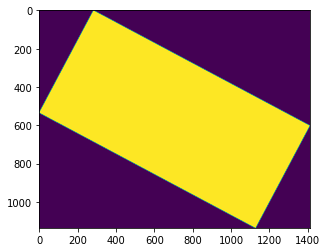

In [4]:
plt.imshow(gray)
plt.show()

plt.imshow(thresh)
plt.show()

In [5]:
# grab the (x, y) coordinates of all pixel values that are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all coordinates
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
# the `cv2.minAreaRect` function returns values in the range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we need to add 90 degrees to the angle
print(angle)
if angle < -45:
    angle = -(90 + angle)
    print("Less than -45", angle)
# otherwise, just take the inverse of the angle to make it positive
else:
    angle = -angle
    print("Greater than -45", angle)

-27.979473114013672
Greater than -45 27.979473114013672


In [6]:
# rotate the image to deskew it
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

In [7]:
print(angle)

27.979473114013672


In [ ]:
# show the output image
print("[INFO] angle: {:.3f}".format(angle))
cv2.imshow("Input", img)
cv2.imshow("Rotated", rotated)
cv2.waitKey(0)

In [ ]:
## (1) Convert to gray, and threshold
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

## (2) Morph-op to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

## (3) Find the max-area contour
cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnt = sorted(cnts, key=cv2.contourArea)[-1]

## (4) Crop and save it
x,y,w,h = cv2.boundingRect(cnt)
dst = rotated[y:y+h, x:x+w]
plt.imshow(dst)
plt.show()
# cv2.imwrite('1.jpg', dst)

## GrayScale conversion

In [26]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cv2
# from sewar.full_ref import uqi, psnr, rmse, ssim
import pandas as pd
sns.set()
from scipy import signal
%matplotlib inline

In [34]:
img_paths=os.listdir('images/train_cleaned')
img_paths=['images/train_cleaned/'+x for x in img_paths]
# print(img_paths)
# img_paths.index('train_cleaned/72.png')
cleaned_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]
print(type(cleaned_img), len(cleaned_img), cleaned_img[0].shape)

<class 'list'> 176 (420, 540)


In [35]:
img_paths=os.listdir('images/train')
img_paths=['images/train/'+x for x in img_paths]
dirty_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]
print(type(dirty_img), len(dirty_img), dirty_img[0].shape)

<class 'list'> 176 (420, 540)


In [36]:
# image_dirty = cv2.imread('images/train/101.png')
# image_clean = cv2.imread('images/train_cleaned/101.png')

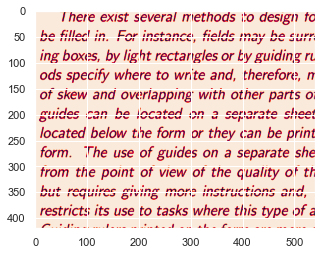

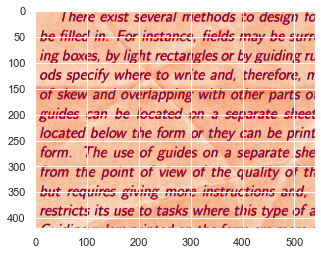

In [37]:
# clean=cleaned_img[0]
# dirty=dirty_img[0]
plt.imshow(cleaned_img[0])
plt.show()
plt.imshow(dirty_img[0])
plt.show()

In [20]:
# print(image_dirty.shape[0],image_dirty.shape[1], image_dirty.shape[2], type(image_dirty))
# gray_dirty = cv2.cvtColor(image_dirty, cv2.COLOR_BGR2GRAY)
# gray_clean = cv2.cvtColor(image_clean, cv2.COLOR_BGR2GRAY)
# # print(image_dirty.shape[2])
# # print(dirty_flat.shape)
# print(gray_dirty.shape, type(gray_dirty), gray_clean.shape, type(gray_clean))

420 540 3 <class 'numpy.ndarray'>
(420, 540) <class 'numpy.ndarray'> (420, 540) <class 'numpy.ndarray'>


In [18]:
dirty_flat=gray_dirty.flatten()
print(dirty_flat)
x=np.reshape(dirty_flat, (gray_dirty.shape[0]*gray_dirty.shape[1], 1))
clean_flat=gray_clean.flatten()
y=np.reshape(clean_flat, (gray_clean.shape[0]*gray_clean.shape[1], 1))

[233 234 236 ... 156  96  61]


Text(0.5, 1.0, 'Dirty Intensity v/ Clean Intensity')

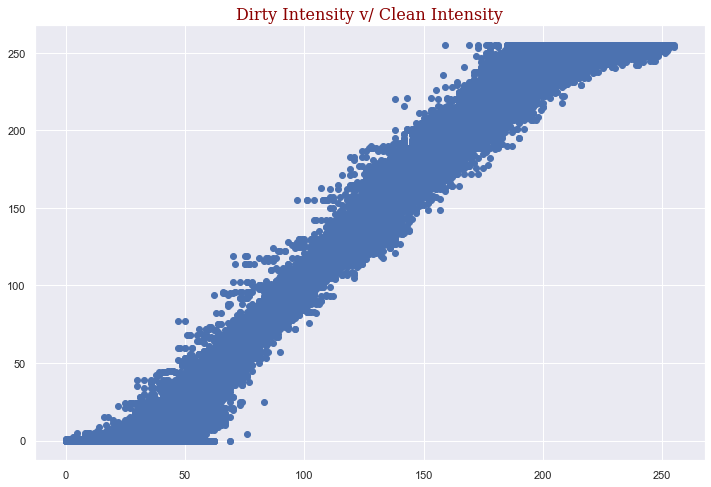

In [19]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = True
fig=plt.figure(figsize=(12,8))
plt.scatter(gray_dirty,gray_clean)
plt.title('Dirty Intensity v/ Clean Intensity', fontdict=font)